<a href="https://colab.research.google.com/github/kobrue02/evaluating-llm-generated-nlu-data/blob/main/bin/notebooks/train_eval_nlu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kobrue02/evaluating-llm-generated-nlu-data/
%cd evaluating-llm-generated-nlu-data

Cloning into 'evaluating-llm-generated-nlu-data'...
remote: Enumerating objects: 836, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 836 (delta 167), reused 124 (delta 70), pack-reused 591 (from 1)
Receiving objects: 100% (836/836), 4.73 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (549/549), done.
/content/evaluating-llm-generated-nlu-data


In [2]:
from bin.framework.nlu_model import IntentClassifier
from bin.utils.methods import *

In [3]:
model = IntentClassifier()
datasets = [
    "zero_shot_simple_data",
    "one_shot_simple_data",
    "few_shot_simple_data",
    "chain_of_thought_simple_data",
    "persona_based_prompt_s1_data"
]

In [ ]:
reports = {}
for fname in datasets:
    df = load_df(fname)
    train_df, test_df = model.split_dataset(df)
    model.fit(train_df)
    report = model.evaluate(test_df)
    reports[fname] = report

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def stacked_bar_chart(reports):
  # Create a dictionary to store the weighted averages
  weighted_averages = {}

  for dataset_name, report in reports.items():
    weighted_averages[dataset_name] = {}
    for intent, metrics in report.items():
      if intent != 'accuracy' and intent !='macro avg' and intent != 'weighted avg':
        weighted_averages[dataset_name][intent] = {
              'precision': metrics['precision'],
              'recall': metrics['recall'],
              'f1-score': metrics['f1-score']
          }


  # Convert the weighted_averages dictionary to a Pandas DataFrame for easier plotting
  df_list = []
  for dataset_name, intents in weighted_averages.items():
      for intent, metrics in intents.items():
          df_list.append({
              'dataset': dataset_name,
              'intent': intent,
              'precision': metrics['precision'],
              'recall': metrics['recall'],
              'f1-score': metrics['f1-score']
          })
  df = pd.DataFrame(df_list)

  # Plotting
  fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(12, 6 * len(datasets)), sharex=True)

  for i, dataset_name in enumerate(datasets):
      dataset_df = df[df['dataset'] == dataset_name]
      dataset_df = dataset_df.set_index('intent')[['precision', 'recall', 'f1-score']]
      dataset_df.plot(kind='bar', stacked=True, ax=axes[i], colormap="Set3")
      axes[i].set_title(f'Metrics per intent for {dataset_name}')
      axes[i].set_ylabel('Score')
      axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
      # add a horizontal line with the weighted average f1 score
      weighted_avg_f1 = df[df['dataset'] == dataset_name]['f1-score'].mean()
      axes[i].axhline(y=weighted_avg_f1, color='b', linestyle='-')
  plt.tight_layout()
  plt.show()


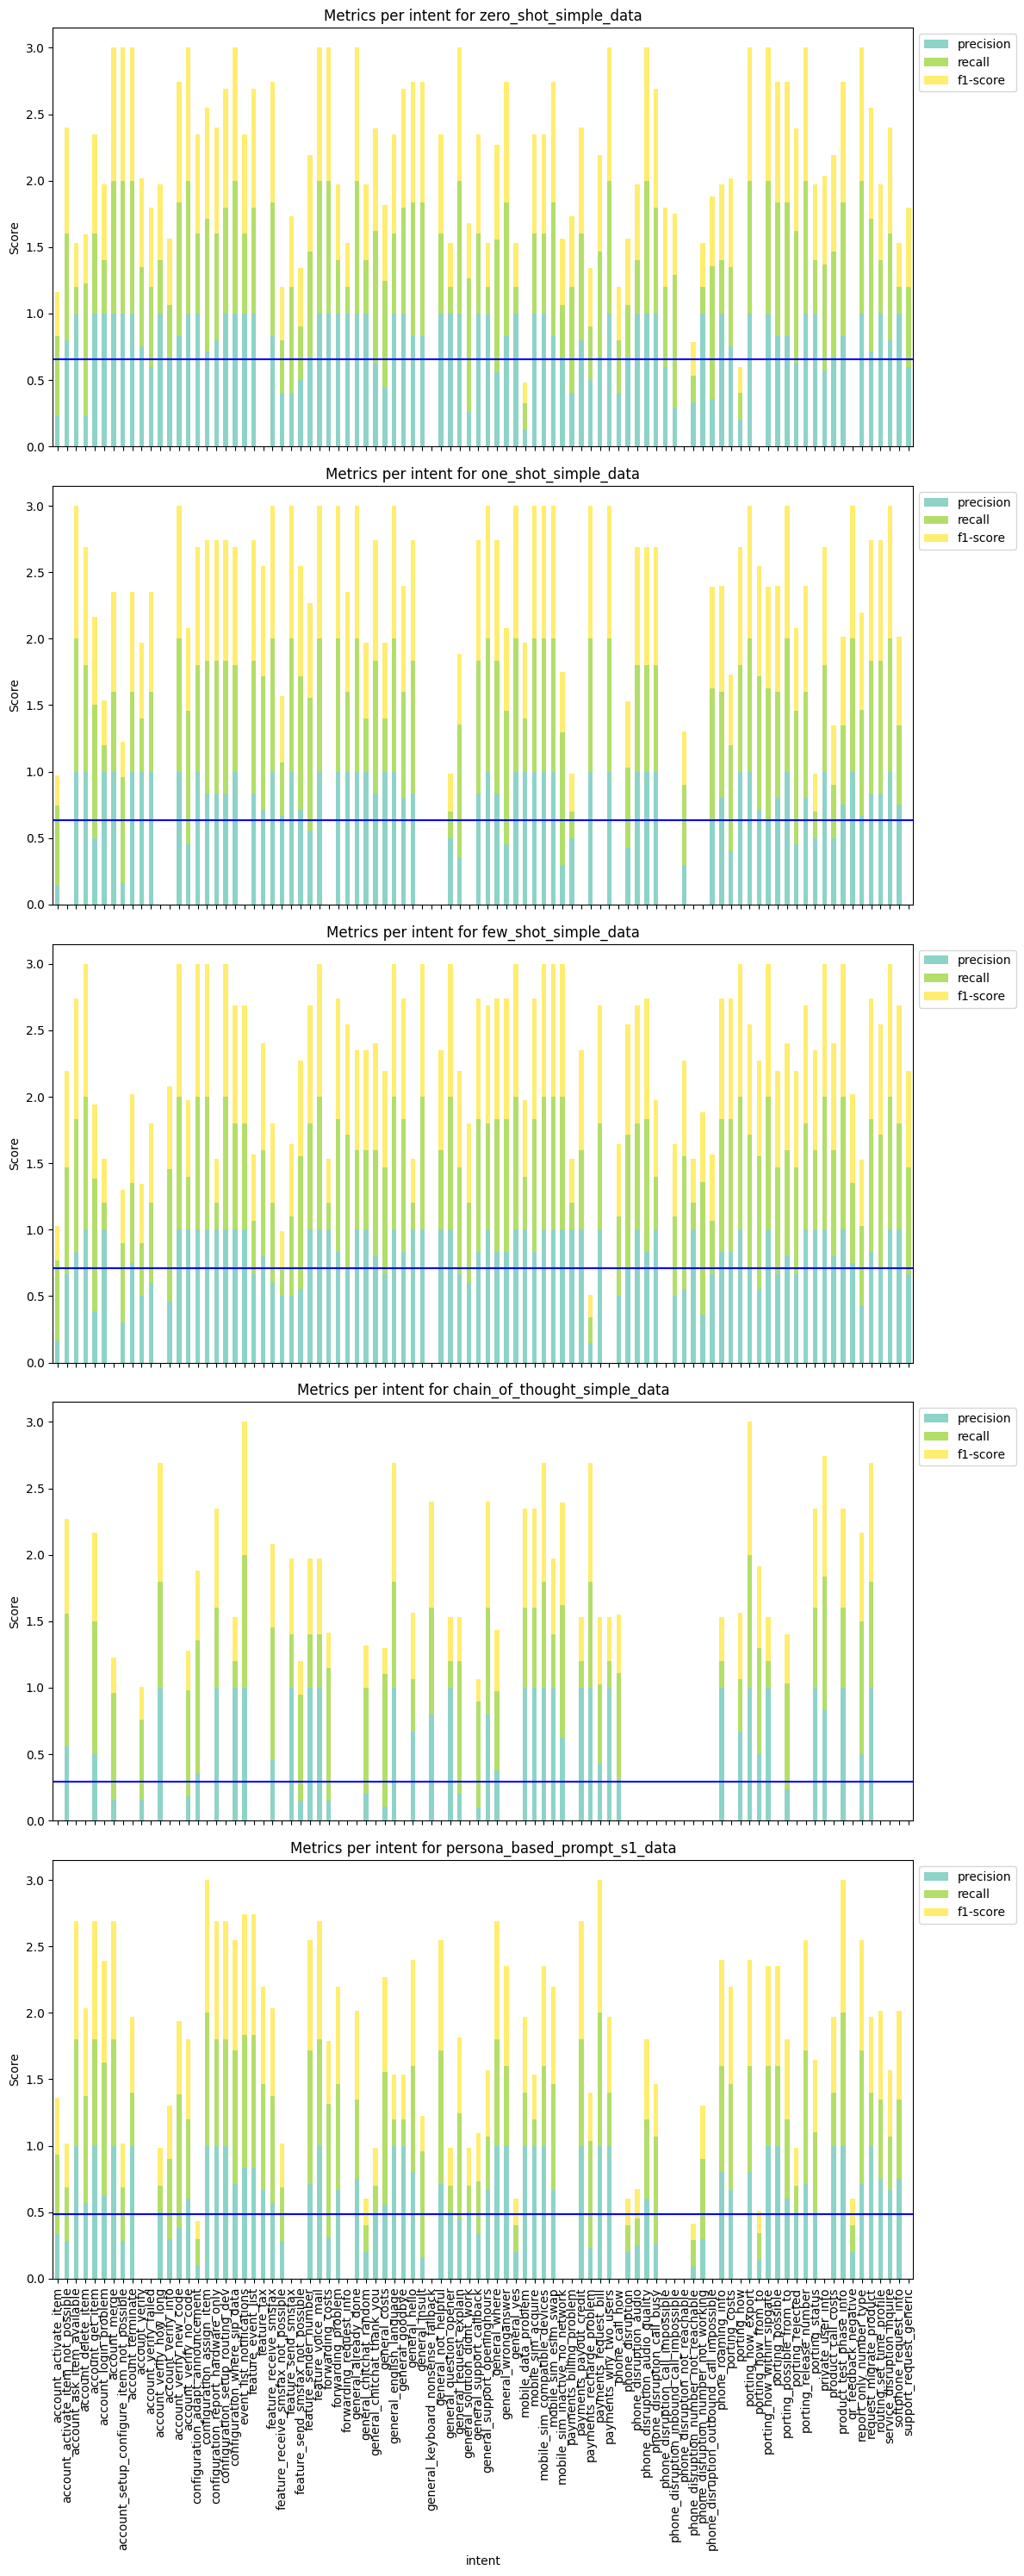

In [39]:
stacked_bar_chart(reports)

In [15]:
def heatmap(reports):
  for dataset_name, report in reports.items():
    # Convert report to DataFrame
    df_report = pd.DataFrame(report).transpose()
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'{dataset_name.title()} Classification Report Heatmap')
    plt.show()

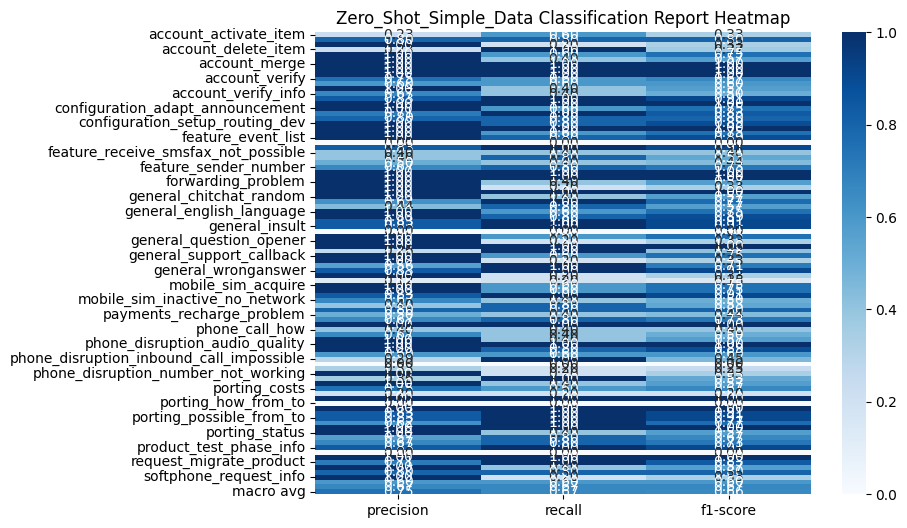

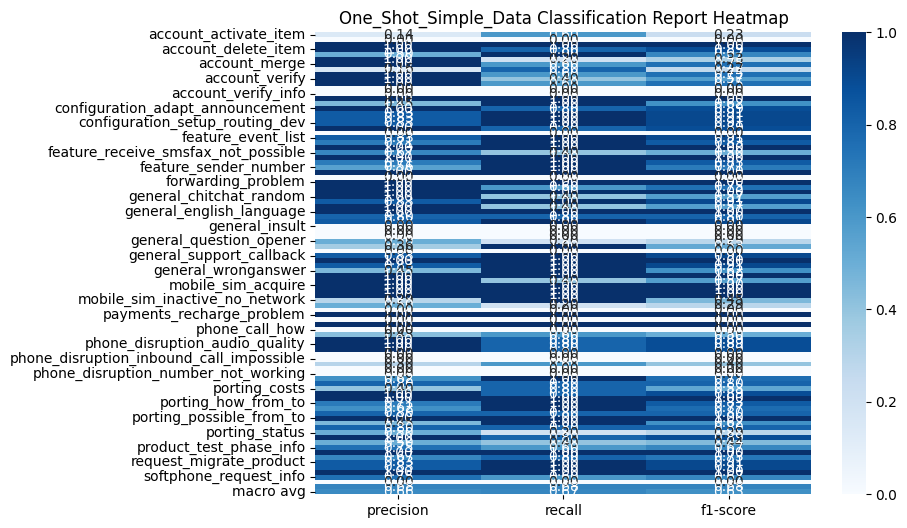

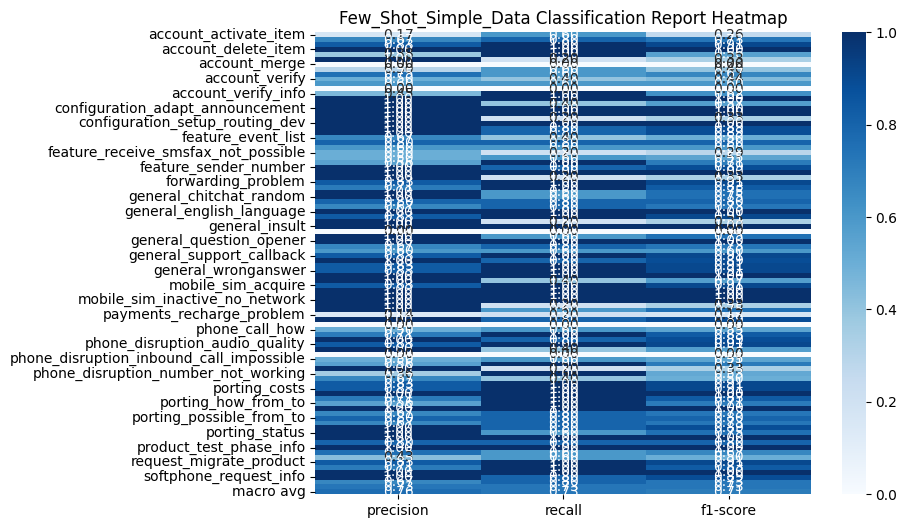

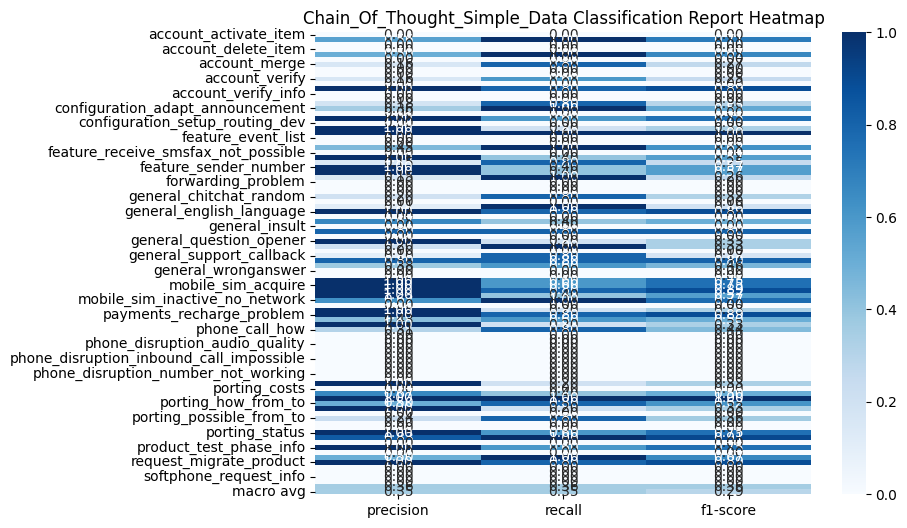

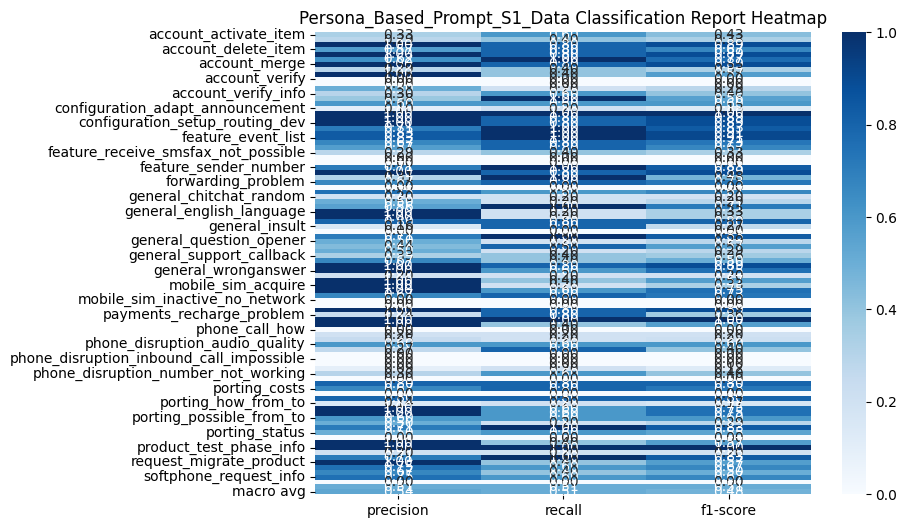

In [16]:
heatmap(reports)